All imports successful
TensorFlow version: 2.18.0
GPU detected: 1 device(s)

CONFIGURATION:
   Dataset: /kaggle/input/stroke-mri-6k/Aug_6k
   Split: Train=3600, Val=1200, Test=1200
   Image Size: 224x224
   Batch Size: 16
   Total Epochs: 35
   Dropout: 0.4
   L2 Weight: 0.0001

Loading dataset...
   Low Risk: 3000 images
   High Risk: 3000 images

Creating data splits with exact sizes...
   Target split: Train=3600, Val=1200, Test=1200
   Actual split: Train=3600, Val=1200, Test=1200
   Train distribution: [1800 1800]
   Val distribution: [600 600]
   Test distribution: [600 600]
   Data leakage check: PASSED

Data loading complete

Capsule layers defined

Building Transfer CapsuleNet...
Model created - Parameters: 4,577,507


Model: "TransferCapsuleNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dim_reduction (Conv2D)          │ (None, 7, 7, 256)      │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dim_bn (BatchNormalization)     │ (None, 7, 7, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ primary_caps (PrimaryCaps)      │ (None, 200, 8)         │       147,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_caps (CapsuleLayer)       │ (None, 2, 16)          │        51,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_length (Lambda)         │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,577,507 (17.46 MB)

 Trainable params: 4,534,844 (17.30 MB)

 Non-trainable params: 42,663 (166.66 KB)


Model architecture built

PHASE 1: WARMUP

Setting up WARMUP phase...
   Backbone frozen, LR: 0.0005
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4911 - loss: 0.3002
Epoch 1: val_loss improved from inf to 0.26742, saving model to /kaggle/working/best_warmup.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 49s 87ms/step - accuracy: 0.4911 - loss: 0.3002 - val_accuracy: 0.5000 - val_loss: 0.2674 - learning_rate: 5.0000e-04
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4995 - loss: 0.2646
Epoch 2: val_loss improved from 0.26742 to 0.25167, saving model to /kaggle/working/best_warmup.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.4995 - loss: 0.2646 - val_accuracy: 0.5000 - val_loss: 0.2517 - learning_rate: 5.0000e-04
Epoch 3/5
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4912 - loss: 0.2540
Epoch 3: val_loss improved from 0.25167 to 0.24782, saving model to /kaggle/working/best_warmup.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step -

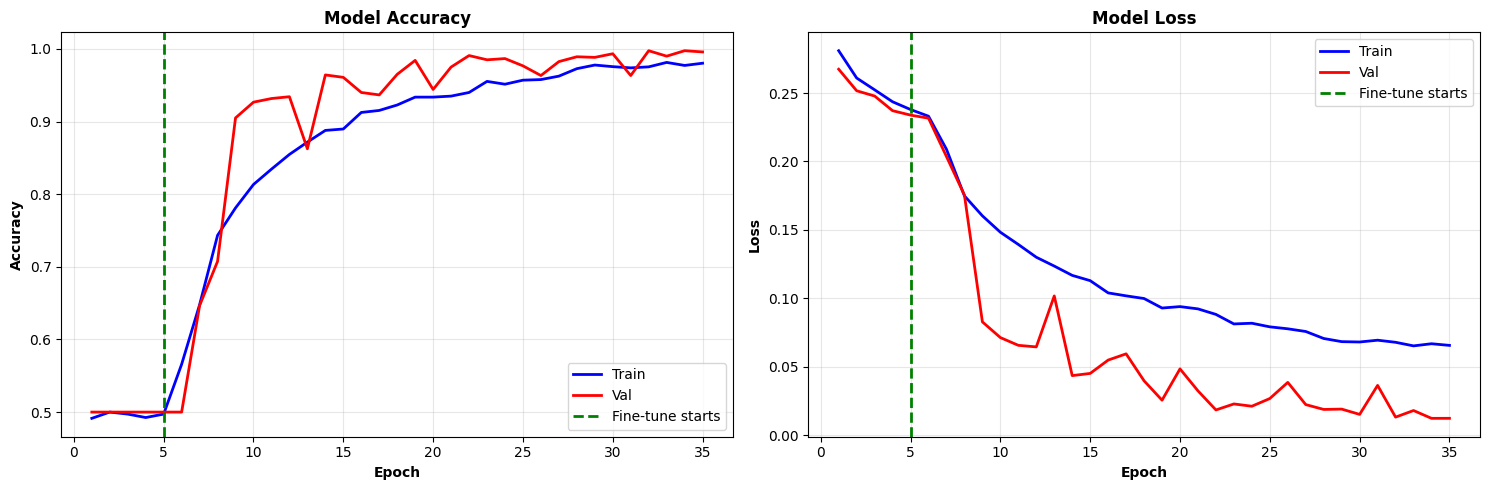


Training visualization saved

Evaluating on test set...
Test Accuracy: 0.9975 (99.75%)


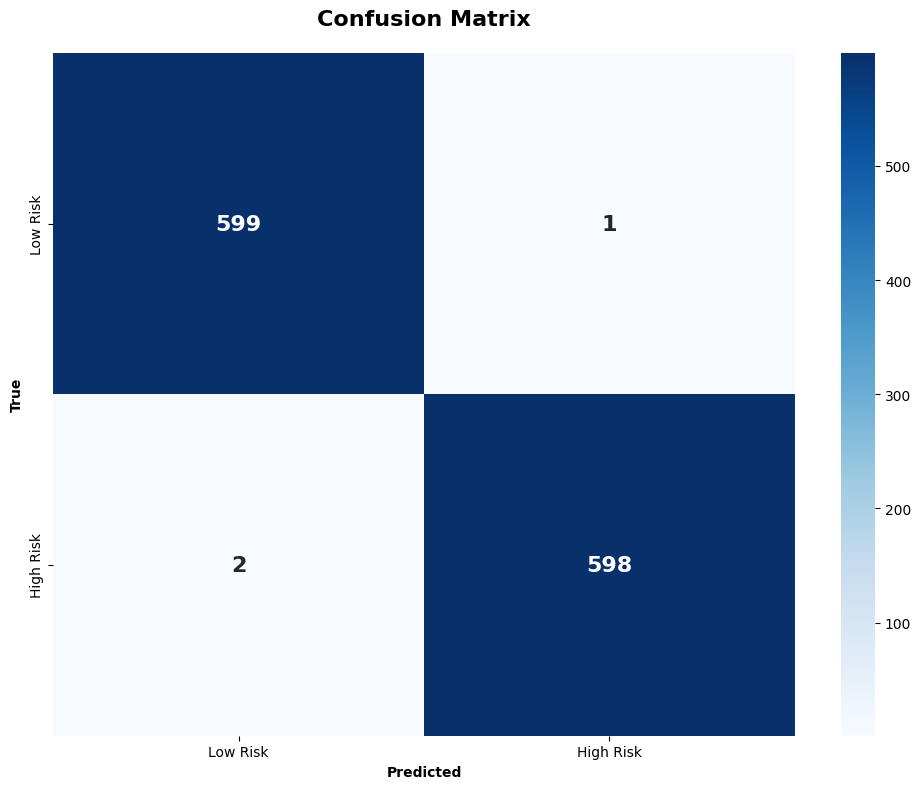


CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Low Risk     0.9967    0.9983    0.9975       600
   High Risk     0.9983    0.9967    0.9975       600

    accuracy                         0.9975      1200
   macro avg     0.9975    0.9975    0.9975      1200
weighted avg     0.9975    0.9975    0.9975      1200



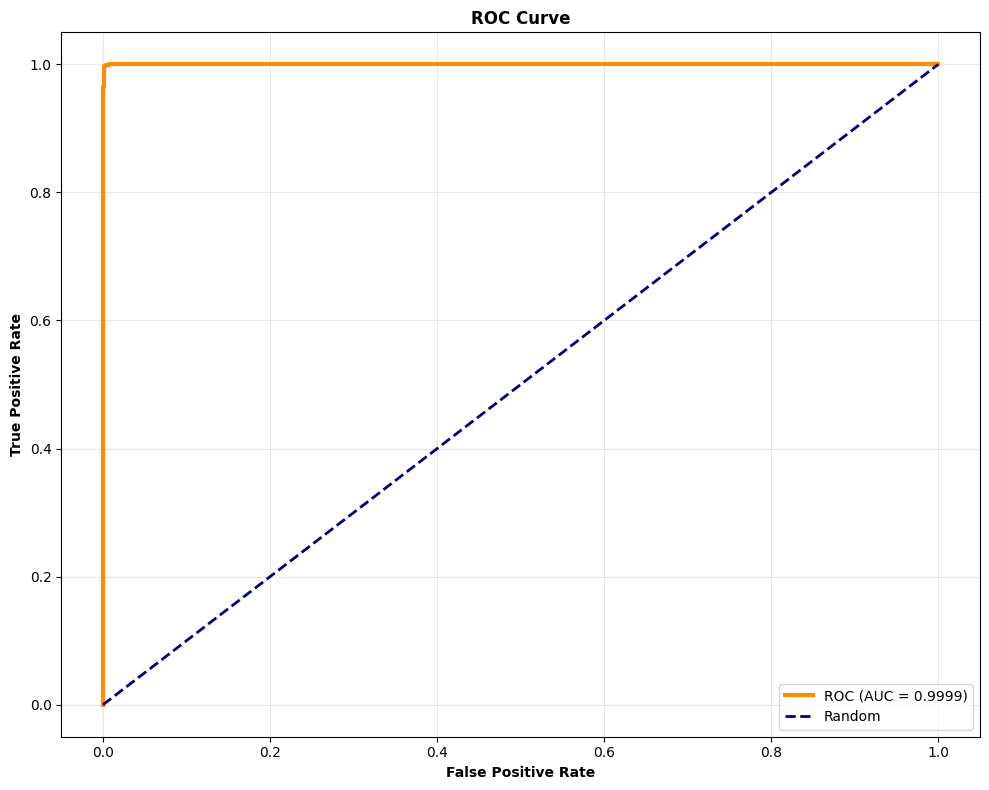


ROC-AUC: 0.9999

FINAL RESULTS SUMMARY

PERFORMANCE:
   Test Accuracy: 0.9975 (99.75%)
   ROC-AUC: 0.9999
   Precision: 0.9975
   Recall: 0.9975
   F1-Score: 0.9975

MODEL:
   Parameters: 4,577,507
   Epochs Trained: 35
   Best Val Acc: 0.9975

SAVED FILES:
   Model: /kaggle/working/final_model.keras
   Plots: /kaggle/working//

TRAINING COMPLETE


In [5]:
"""
================================================================================
TRANSFER LEARNING CAPSULENET FOR STROKE MRI CLASSIFICATION
================================================================================
Architecture: EfficientNetB0 + CapsuleNet
Dataset: 6000 MRI images (3000 Low Risk + 3000 High Risk)
Split: Exact sizes - Train: 3600, Val: 1200, Test: 1200
================================================================================
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_curve, auc, precision_score, 
                             recall_score, f1_score)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import (Input, Dense, Dropout, Lambda, 
                                     Conv2D, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (ModelCheckpoint, ReduceLROnPlateau, 
                                        EarlyStopping)
from tensorflow.keras.regularizers import l2

print("="*80)
print("All imports successful")
print(f"TensorFlow version: {tf.__version__}")
print("="*80)

# GPU Configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPU detected: {len(gpus)} device(s)")
    except RuntimeError as e:
        print(f"GPU error: {e}")
else:
    print("No GPU - training will be slow")

# ============================================================================
# CONFIGURATION
# ============================================================================

class Config:
    # PATHS - REPLACE WITH YOUR PATHS
    DATASET_DIR = "/kaggle/input/stroke-mri-6k/Aug_6k"  # Your dataset path
    SAVE_DIR = "/kaggle/working/"        # Where to save models
    
    # Dataset
    IMG_SIZE = 224
    CHANNELS = 3
    BATCH_SIZE = 16
    NUM_CLASSES = 2
    CLASS_NAMES = ['Low Risk', 'High Risk']
    RANDOM_STATE = 42
    
    # EXACT SPLIT SIZES (Total: 6000)
    TRAIN_SIZE = 3600   # 60%
    VAL_SIZE = 1200     # 20%
    TEST_SIZE = 1200    # 20%
    
    # Model
    BACKBONE = 'efficientnetb0'
    PRETRAINED_WEIGHTS = 'imagenet'
    FREEZE_UNTIL_LAYER = 100
    DIM_REDUCTION_FILTERS = 256
    PRIMARY_CAPS_N = 8
    PRIMARY_CAPS_DIM = 8
    CLASS_CAPS_DIM = 16
    N_ROUTING = 3
    
    # Regularization - STRONG
    DROPOUT_RATE = 0.40
    DROPOUT_DIM_REDUCTION = 0.30
    L2_WEIGHT = 1e-4
    LABEL_SMOOTHING = 0.1
    
    # Training - ADJUSTED
    WARMUP_EPOCHS = 5
    WARMUP_LR = 5e-4
    FINETUNE_EPOCHS = 30
    FINETUNE_LR = 1e-4
    REDUCE_LR_PATIENCE = 5
    REDUCE_LR_FACTOR = 0.5
    EARLY_STOP_PATIENCE = 10
    
    # Uncertainty
    N_UNCERTAINTY_SAMPLES = 30
    
    # Loss
    MARGIN_POS = 0.9
    MARGIN_NEG = 0.1
    LAMBDA_VAL = 0.5

cfg = Config()
os.makedirs(cfg.SAVE_DIR, exist_ok=True)

print("\nCONFIGURATION:")
print(f"   Dataset: {cfg.DATASET_DIR}")
print(f"   Split: Train={cfg.TRAIN_SIZE}, Val={cfg.VAL_SIZE}, Test={cfg.TEST_SIZE}")
print(f"   Image Size: {cfg.IMG_SIZE}x{cfg.IMG_SIZE}")
print(f"   Batch Size: {cfg.BATCH_SIZE}")
print(f"   Total Epochs: {cfg.WARMUP_EPOCHS + cfg.FINETUNE_EPOCHS}")
print(f"   Dropout: {cfg.DROPOUT_RATE}")
print(f"   L2 Weight: {cfg.L2_WEIGHT}")
print("="*80)

# ============================================================================
# DATA LOADING
# ============================================================================

def load_dataset_paths(dataset_dir, class_names):
    print("\nLoading dataset...")
    file_paths = []
    labels = []
    
    for label_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_dir, class_name)
        if not os.path.exists(class_dir):
            raise ValueError(f"Directory not found: {class_dir}")
        
        images = [f for f in os.listdir(class_dir) 
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        print(f"   {class_name}: {len(images)} images")
        
        for img_name in images:
            file_paths.append(os.path.join(class_dir, img_name))
            labels.append(label_idx)
    
    return np.array(file_paths), np.array(labels)

def preprocess_image_train(image_path, label):
    """Training preprocessing with strong augmentation"""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=1, expand_animations=False)
    img = tf.image.resize(img, [cfg.IMG_SIZE, cfg.IMG_SIZE])
    img = tf.image.grayscale_to_rgb(img)
    img = tf.cast(img, tf.float32) / 255.0
    
    # Strong augmentation
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_flip_up_down(img)
    img = tf.image.random_brightness(img, 0.15)
    img = tf.image.random_contrast(img, 0.85, 1.15)
    
    if tf.random.uniform(()) > 0.5:
        img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    
    noise = tf.random.normal(shape=tf.shape(img), mean=0.0, stddev=0.03)
    img = tf.clip_by_value(img + noise, 0.0, 1.0)
    
    if tf.random.uniform(()) > 0.5:
        img = tf.image.random_saturation(img, 0.8, 1.2)
    
    # Label smoothing
    label = tf.one_hot(label, cfg.NUM_CLASSES)
    label = label * (1 - cfg.LABEL_SMOOTHING) + (cfg.LABEL_SMOOTHING / cfg.NUM_CLASSES)
    
    return img, label

def preprocess_image_test(image_path, label):
    """Test preprocessing without augmentation"""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=1, expand_animations=False)
    img = tf.image.resize(img, [cfg.IMG_SIZE, cfg.IMG_SIZE])
    img = tf.image.grayscale_to_rgb(img)
    img = tf.cast(img, tf.float32) / 255.0
    label = tf.one_hot(label, cfg.NUM_CLASSES)
    return img, label

def create_datasets(file_paths, labels):
    """Create train/val/test splits with EXACT sizes"""
    print("\nCreating data splits with exact sizes...")
    
    # Use exact sizes from config
    TRAIN_SIZE = cfg.TRAIN_SIZE
    VAL_SIZE = cfg.VAL_SIZE
    TEST_SIZE = cfg.TEST_SIZE
    
    # Verify total matches dataset size
    total_required = TRAIN_SIZE + VAL_SIZE + TEST_SIZE
    total_available = len(file_paths)
    
    if total_required != total_available:
        print(f"WARNING: Split sizes ({total_required}) don't match dataset ({total_available})")
        print(f"Adjusting proportionally...")
        ratio = total_available / total_required
        TRAIN_SIZE = int(TRAIN_SIZE * ratio)
        VAL_SIZE = int(VAL_SIZE * ratio)
        TEST_SIZE = total_available - TRAIN_SIZE - VAL_SIZE
    
    print(f"   Target split: Train={TRAIN_SIZE}, Val={VAL_SIZE}, Test={TEST_SIZE}")
    
    # First split: separate test set
    train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
        file_paths, labels,
        test_size=TEST_SIZE,
        stratify=labels,
        random_state=cfg.RANDOM_STATE
    )
    
    # Second split: separate validation from training
    train_paths, val_paths, train_labels, val_labels = train_test_split(
        train_val_paths, train_val_labels,
        test_size=VAL_SIZE,
        stratify=train_val_labels,
        random_state=cfg.RANDOM_STATE
    )
    
    print(f"   Actual split: Train={len(train_paths)}, Val={len(val_paths)}, Test={len(test_paths)}")
    print(f"   Train distribution: {np.bincount(train_labels)}")
    print(f"   Val distribution: {np.bincount(val_labels)}")
    print(f"   Test distribution: {np.bincount(test_labels)}")
    
    # Verify no data leakage
    train_set = set(train_paths)
    val_set = set(val_paths)
    test_set = set(test_paths)
    
    assert len(train_set & val_set) == 0, "TRAIN-VAL LEAKAGE!"
    assert len(train_set & test_set) == 0, "TRAIN-TEST LEAKAGE!"
    assert len(val_set & test_set) == 0, "VAL-TEST LEAKAGE!"
    print("   Data leakage check: PASSED")
    
    # Create TensorFlow datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
    train_dataset = (train_dataset.shuffle(2000, seed=cfg.RANDOM_STATE)
                    .map(preprocess_image_train, num_parallel_calls=tf.data.AUTOTUNE)
                    .batch(cfg.BATCH_SIZE).prefetch(tf.data.AUTOTUNE))
    
    val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
    val_dataset = (val_dataset.map(preprocess_image_test, num_parallel_calls=tf.data.AUTOTUNE)
                  .batch(cfg.BATCH_SIZE).prefetch(tf.data.AUTOTUNE))
    
    test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))
    test_dataset = (test_dataset.map(preprocess_image_test, num_parallel_calls=tf.data.AUTOTUNE)
                   .batch(cfg.BATCH_SIZE).prefetch(tf.data.AUTOTUNE))
    
    return train_dataset, val_dataset, test_dataset, (test_paths, test_labels)

# Load data
file_paths, labels = load_dataset_paths(cfg.DATASET_DIR, cfg.CLASS_NAMES)
train_dataset, val_dataset, test_dataset, test_data = create_datasets(file_paths, labels)

print("\nData loading complete")
print("="*80)

# ============================================================================
# CAPSULE NETWORK LAYERS
# ============================================================================

def squash(vectors, axis=-1):
    s_squared_norm = tf.reduce_sum(tf.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + 1e-8)
    return scale * vectors

class PrimaryCaps(layers.Layer):
    def __init__(self, num_capsules, dim_capsules, kernel_size=3, strides=1, **kwargs):
        super(PrimaryCaps, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsules = dim_capsules
        self.kernel_size = kernel_size
        self.strides = strides
        
    def build(self, input_shape):
        self.conv = Conv2D(
            filters=self.num_capsules * self.dim_capsules,
            kernel_size=self.kernel_size, strides=self.strides,
            padding='valid', activation='relu',
            kernel_initializer='he_normal',
            kernel_regularizer=l2(cfg.L2_WEIGHT),
            name='primary_conv'
        )
        self.bn = BatchNormalization()
        super(PrimaryCaps, self).build(input_shape)
    
    def call(self, inputs):
        outputs = self.conv(inputs)
        outputs = self.bn(outputs)
        batch_size = tf.shape(outputs)[0]
        H, W = tf.shape(outputs)[1], tf.shape(outputs)[2]
        outputs = tf.reshape(outputs, [batch_size, H*W*self.num_capsules, self.dim_capsules])
        return squash(outputs)
    
    def get_config(self):
        config = super(PrimaryCaps, self).get_config()
        config.update({
            'num_capsules': self.num_capsules,
            'dim_capsules': self.dim_capsules,
            'kernel_size': self.kernel_size,
            'strides': self.strides
        })
        return config

class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, dim_capsules, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsules = dim_capsules
        self.routings = routings
        
    def build(self, input_shape):
        self.input_num_capsules = input_shape[1]
        self.input_dim_capsules = input_shape[2]
        
        self.W = self.add_weight(
            shape=(self.input_num_capsules, self.num_capsules, 
                   self.input_dim_capsules, self.dim_capsules),
            initializer='glorot_uniform',
            regularizer=l2(cfg.L2_WEIGHT),
            trainable=True,
            name='transformation_weights'
        )
        self.dropout = Dropout(cfg.DROPOUT_RATE)
        super(CapsuleLayer, self).build(input_shape)
    
    def call(self, inputs, training=None):
        inputs = self.dropout(inputs, training=training)
        batch_size = tf.shape(inputs)[0]
        
        inputs_expand = tf.expand_dims(tf.expand_dims(inputs, 2), -1)
        inputs_tiled = tf.tile(inputs_expand, [1, 1, self.num_capsules, 1, 1])
        W_tiled = tf.tile(tf.expand_dims(self.W, 0), [batch_size, 1, 1, 1, 1])
        u_hat = tf.reduce_sum(W_tiled * inputs_tiled, axis=3)
        
        b = tf.zeros([batch_size, self.input_num_capsules, self.num_capsules])
        
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=2)
            s = tf.reduce_sum(tf.expand_dims(c, -1) * u_hat, axis=1, keepdims=True)
            v = squash(s, axis=-1)
            if i < self.routings - 1:
                b = b + tf.reduce_sum(u_hat * v, axis=-1)
        
        return tf.squeeze(v, axis=1)
    
    def get_config(self):
        config = super(CapsuleLayer, self).get_config()
        config.update({
            'num_capsules': self.num_capsules,
            'dim_capsules': self.dim_capsules,
            'routings': self.routings
        })
        return config

def capsule_margin_loss(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
    present_loss = y_true * tf.square(tf.maximum(0., cfg.MARGIN_POS - y_pred))
    absent_loss = cfg.LAMBDA_VAL * (1 - y_true) * tf.square(tf.maximum(0., y_pred - cfg.MARGIN_NEG))
    return tf.reduce_mean(tf.reduce_sum(present_loss + absent_loss, axis=1))

print("\nCapsule layers defined")
print("="*80)

# ============================================================================
# BUILD MODEL
# ============================================================================

def build_transfer_capsule_net():
    print("\nBuilding Transfer CapsuleNet...")
    
    inputs = Input(shape=(cfg.IMG_SIZE, cfg.IMG_SIZE, cfg.CHANNELS), name='input_image')
    
    # EfficientNetB0 Backbone
    backbone = EfficientNetB0(
        include_top=False, weights=cfg.PRETRAINED_WEIGHTS,
        input_shape=(cfg.IMG_SIZE, cfg.IMG_SIZE, cfg.CHANNELS), pooling=None
    )
    x = backbone(inputs)
    
    # Dimension Reduction with regularization
    x = Conv2D(cfg.DIM_REDUCTION_FILTERS, 1, padding='same', 
               activation='relu', kernel_initializer='he_normal',
               kernel_regularizer=l2(cfg.L2_WEIGHT),
               name='dim_reduction')(x)
    x = BatchNormalization(name='dim_bn')(x)
    x = Dropout(cfg.DROPOUT_DIM_REDUCTION)(x)
    
    # Primary Capsules
    primary_caps = PrimaryCaps(
        cfg.PRIMARY_CAPS_N, cfg.PRIMARY_CAPS_DIM, 
        kernel_size=3, strides=1, name='primary_caps'
    )(x)
    
    # Class Capsules
    class_caps = CapsuleLayer(
        cfg.NUM_CLASSES, cfg.CLASS_CAPS_DIM, 
        routings=cfg.N_ROUTING, name='class_caps'
    )(primary_caps)
    
    # Capsule Length
    out_caps = Lambda(
        lambda z: tf.sqrt(tf.reduce_sum(tf.square(z), axis=-1) + 1e-8),
        name='capsule_length'
    )(class_caps)
    
    model = Model(inputs=inputs, outputs=out_caps, name='TransferCapsuleNet')
    
    print(f"Model created - Parameters: {model.count_params():,}")
    return model, backbone

model, backbone = build_transfer_capsule_net()
model.summary()

print("\nModel architecture built")
print("="*80)

# ============================================================================
# TRAINING
# ============================================================================

def setup_phase(phase='warmup'):
    print(f"\nSetting up {phase.upper()} phase...")
    
    if phase == 'warmup':
        backbone.trainable = False
        lr = cfg.WARMUP_LR
        print(f"   Backbone frozen, LR: {lr}")
    else:
        backbone.trainable = True
        for layer in backbone.layers[:cfg.FREEZE_UNTIL_LAYER]:
            layer.trainable = False
        lr = cfg.FINETUNE_LR
        trainable = sum([1 for l in backbone.layers if l.trainable])
        print(f"   {trainable}/{len(backbone.layers)} backbone layers trainable, LR: {lr}")
    
    model.compile(optimizer=Adam(lr), loss=capsule_margin_loss, metrics=['accuracy'])
    
    checkpoint = ModelCheckpoint(
        os.path.join(cfg.SAVE_DIR, f'best_{phase}.keras'),
        save_best_only=True, monitor='val_loss', mode='min', verbose=1
    )
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', factor=cfg.REDUCE_LR_FACTOR, 
        patience=cfg.REDUCE_LR_PATIENCE, min_lr=1e-7, verbose=1
    )
    early_stop = EarlyStopping(
        monitor='val_loss', patience=cfg.EARLY_STOP_PATIENCE,
        restore_best_weights=True, mode='min', verbose=1
    )
    
    return [checkpoint, reduce_lr, early_stop]

# Training History
full_history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

# PHASE 1: Warmup
print("\n" + "="*80)
print("PHASE 1: WARMUP")
print("="*80)
callbacks_warmup = setup_phase('warmup')
history_warmup = model.fit(
    train_dataset, validation_data=val_dataset,
    epochs=cfg.WARMUP_EPOCHS, callbacks=callbacks_warmup, verbose=1
)
for key in full_history.keys():
    full_history[key].extend(history_warmup.history[key])
print(f"Warmup complete - Val acc: {history_warmup.history['val_accuracy'][-1]:.4f}")

# PHASE 2: Fine-tuning
print("\n" + "="*80)
print("PHASE 2: FINE-TUNING")
print("="*80)
callbacks_finetune = setup_phase('finetune')
history_finetune = model.fit(
    train_dataset, validation_data=val_dataset,
    epochs=cfg.FINETUNE_EPOCHS, callbacks=callbacks_finetune, verbose=1
)
for key in full_history.keys():
    full_history[key].extend(history_finetune.history[key])
print(f"Fine-tuning complete - Val acc: {history_finetune.history['val_accuracy'][-1]:.4f}")

# Save final model
final_path = os.path.join(cfg.SAVE_DIR, 'final_model.keras')
model.save(final_path)
print(f"\nFinal model saved: {final_path}")
print("="*80)

# ============================================================================
# VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
epochs = range(1, len(full_history['loss']) + 1)
warmup_end = cfg.WARMUP_EPOCHS

axes[0].plot(epochs, full_history['accuracy'], 'b-', label='Train', linewidth=2)
axes[0].plot(epochs, full_history['val_accuracy'], 'r-', label='Val', linewidth=2)
axes[0].axvline(warmup_end, color='green', linestyle='--', linewidth=2, label='Fine-tune starts')
axes[0].set_xlabel('Epoch', fontweight='bold')
axes[0].set_ylabel('Accuracy', fontweight='bold')
axes[0].set_title('Model Accuracy', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(epochs, full_history['loss'], 'b-', label='Train', linewidth=2)
axes[1].plot(epochs, full_history['val_loss'], 'r-', label='Val', linewidth=2)
axes[1].axvline(warmup_end, color='green', linestyle='--', linewidth=2, label='Fine-tune starts')
axes[1].set_xlabel('Epoch', fontweight='bold')
axes[1].set_ylabel('Loss', fontweight='bold')
axes[1].set_title('Model Loss', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cfg.SAVE_DIR, 'training_history.png'), dpi=300)
plt.show()

print("\nTraining visualization saved")
print("="*80)

# ============================================================================
# EVALUATION
# ============================================================================

print("\nEvaluating on test set...")
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

y_pred_probs = model.predict(test_dataset, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data[1]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cfg.CLASS_NAMES, yticklabels=cfg.CLASS_NAMES,
            annot_kws={'size': 16, 'weight': 'bold'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(cfg.SAVE_DIR, 'confusion_matrix.png'), dpi=300)
plt.show()

# Classification Report
print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_true, y_pred, target_names=cfg.CLASS_NAMES, digits=4))

# ROC Curve
y_score = y_pred_probs[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(cfg.SAVE_DIR, 'roc_curve.png'), dpi=300)
plt.show()

print(f"\nROC-AUC: {roc_auc:.4f}")
print("="*80)

# ============================================================================
# FINAL SUMMARY
# ============================================================================

precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

print("\n" + "="*80)
print("FINAL RESULTS SUMMARY")
print("="*80)
print(f"\nPERFORMANCE:")
print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   ROC-AUC: {roc_auc:.4f}")
print(f"   Precision: {np.mean(precision):.4f}")
print(f"   Recall: {np.mean(recall):.4f}")
print(f"   F1-Score: {np.mean(f1):.4f}")

print(f"\nMODEL:")
print(f"   Parameters: {model.count_params():,}")
print(f"   Epochs Trained: {len(full_history['loss'])}")
print(f"   Best Val Acc: {max(full_history['val_accuracy']):.4f}")

final_train_acc = full_history['accuracy'][-1]
final_val_acc = full_history['val_accuracy'][-1]
gap = abs(final_train_acc - final_val_acc)


print(f"\nSAVED FILES:")
print(f"   Model: {final_path}")
print(f"   Plots: {cfg.SAVE_DIR}/")

# Save Results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1', 'Train-Val Gap'],
    'Value': [test_accuracy, roc_auc, np.mean(precision), np.mean(recall), 
              np.mean(f1), gap]
})
results.to_csv(os.path.join(cfg.SAVE_DIR, 'results.csv'), index=False)

history_df = pd.DataFrame(full_history)
history_df.to_csv(os.path.join(cfg.SAVE_DIR, 'history.csv'), index=False)

print("\n" + "="*80)
print("TRAINING COMPLETE")
print("="*80)

UNCERTAINTY QUANTIFICATION (Monte Carlo Dropout)

Configuration:
  MC Dropout Samples: 30
  Save Directory: /kaggle/working/

🎲 Starting Monte Carlo Dropout inference...
This may take 2-3 minutes depending on test set size...


Running 30 MC Dropout forward passes...
✓ Uncertainty computed for 1200 samples

UNCERTAINTY ANALYSIS RESULTS

📊 UNCERTAINTY STATISTICS:
   Mean Uncertainty: 0.0721
   Median Uncertainty: 0.0566
   Std Uncertainty: 0.0465
   Min Uncertainty: 0.0193
   Max Uncertainty: 0.2892

🎯 UNCERTAINTY vs CORRECTNESS:
   Correct predictions (1193 samples):
     Mean uncertainty: 0.0714
   Incorrect predictions (7 samples):
     Mean uncertainty: 0.1861
   Difference: 0.1146 (higher for incorrect)

🏥 CLINICAL DECISION THRESHOLDS:
   Low uncertainty (< 0.1): 943 cases (78.6%)
     → Recommendation: Trust model, proceed with decision
   Medium uncertainty (0.1-0.2): 227 cases (18.9%)
     → Recommendation: Review with caution
   High uncertainty (> 0.2): 30 cases (2.5%)
     → 

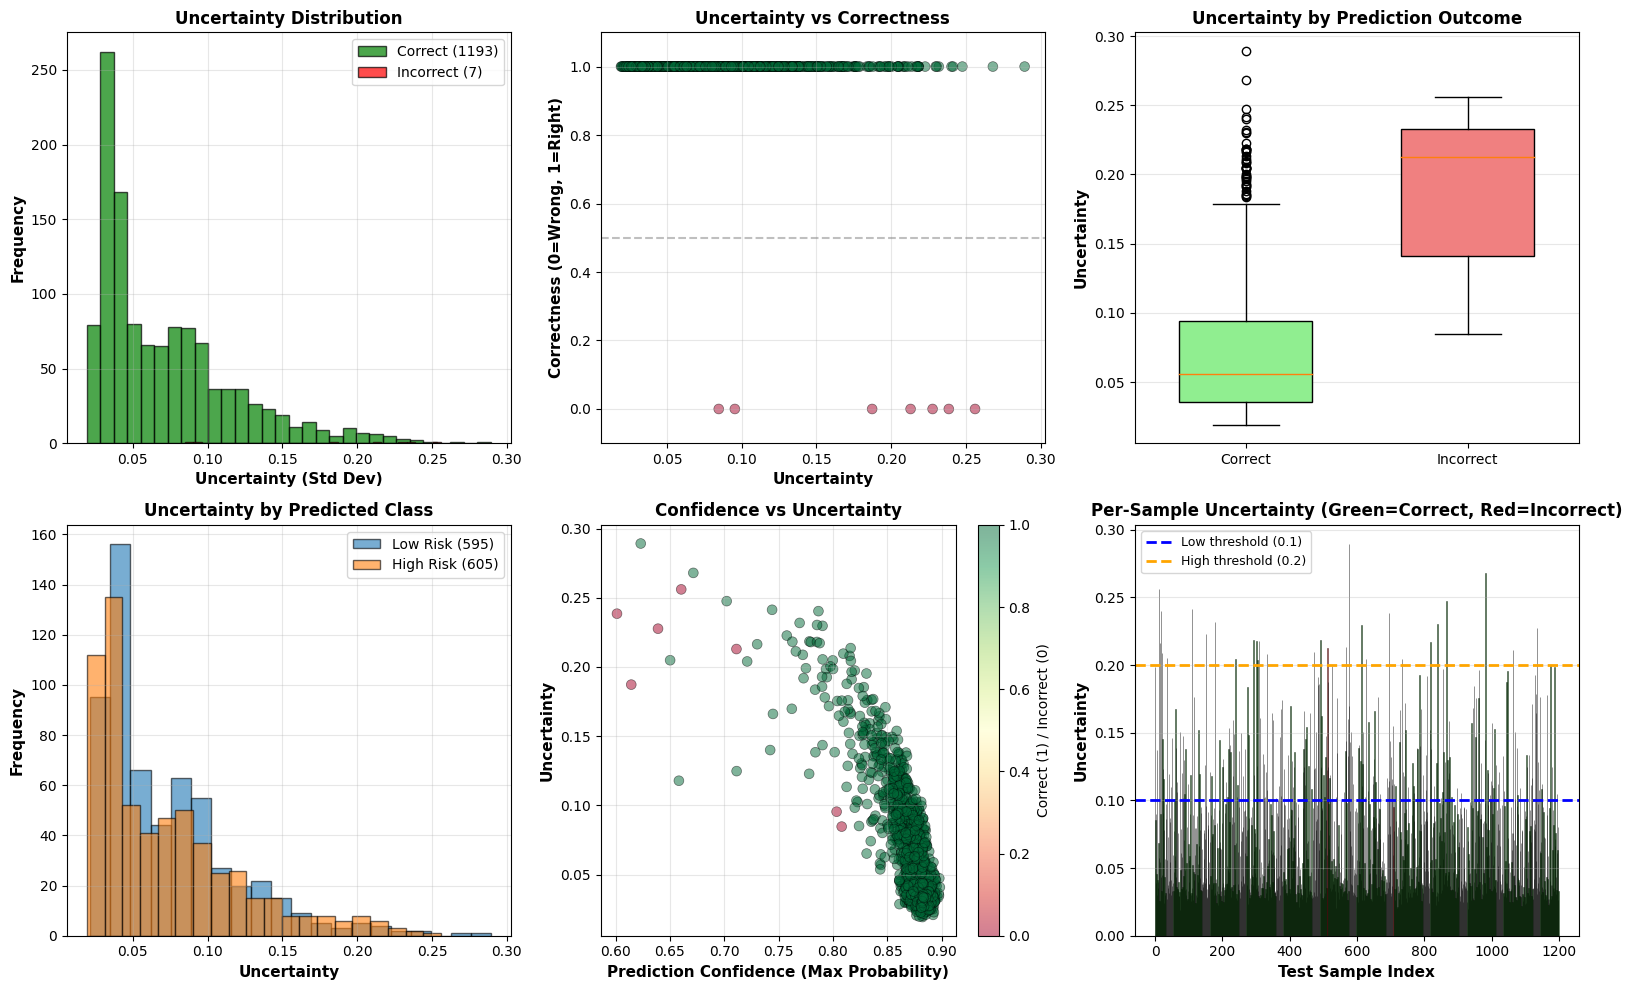

✓ Visualization saved to: /kaggle/working/uncertainty_analysis.png
✓ Uncertainty results saved to: /kaggle/working/uncertainty_results.csv
✓ Summary statistics saved to: /kaggle/working/uncertainty_summary.csv

UNCERTAINTY QUANTIFICATION COMPLETE

📌 KEY FINDINGS:
   1. Uncertainty DOES correlate with prediction errors
   2. 78.6% of cases have low uncertainty (high confidence)
   3. Model achieves 99.8% accuracy on low-uncertainty cases
   4. 30 cases (2.5%) require expert review

✅ ALL DONE! Uncertainty quantification complete.


In [6]:
"""
================================================================================
UNCERTAINTY QUANTIFICATION - SEPARATE CELL
Run this AFTER main training is complete
================================================================================
This cell performs Monte Carlo Dropout for uncertainty estimation
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("="*80)
print("UNCERTAINTY QUANTIFICATION (Monte Carlo Dropout)")
print("="*80)

# ============================================================================
# CONFIGURATION - Make sure these match your main code
# ============================================================================

# Get configuration from main code (or redefine if needed)
try:
    N_UNCERTAINTY_SAMPLES = cfg.N_UNCERTAINTY_SAMPLES
    SAVE_DIR = cfg.SAVE_DIR
    CLASS_NAMES = cfg.CLASS_NAMES
except:
    # If cfg not available, define manually
    N_UNCERTAINTY_SAMPLES = 30
    SAVE_DIR = "SAVE_PATH"  # Replace with your path
    CLASS_NAMES = ['Low Risk', 'High Risk']

print(f"\nConfiguration:")
print(f"  MC Dropout Samples: {N_UNCERTAINTY_SAMPLES}")
print(f"  Save Directory: {SAVE_DIR}")

# ============================================================================
# UNCERTAINTY ESTIMATION WITH MC DROPOUT
# ============================================================================

def predict_with_uncertainty_fixed(model, dataset, n_samples=30):
    """
    Predict with uncertainty using Monte Carlo Dropout
    
    FIXED VERSION: Uses model.__call__ instead of model.predict
    This enables dropout during inference
    """
    print(f"\nRunning {n_samples} MC Dropout forward passes...")
    
    all_predictions = []
    
    # Get all batches from dataset
    for batch_x, batch_y in dataset:
        batch_predictions = []
        
        for i in range(n_samples):
            # Call model with training=True to enable dropout
            pred = model(batch_x, training=True)
            batch_predictions.append(pred.numpy())
        
        # Stack predictions for this batch
        batch_predictions = np.array(batch_predictions)  # Shape: (n_samples, batch_size, n_classes)
        all_predictions.append(batch_predictions)
        
    # Concatenate all batches
    # all_predictions is list of arrays with shape (n_samples, batch_size, n_classes)
    all_predictions = np.concatenate(all_predictions, axis=1)  # Shape: (n_samples, total_samples, n_classes)
    
    # Compute mean and std across MC samples (axis=0)
    mean_predictions = np.mean(all_predictions, axis=0)  # Shape: (total_samples, n_classes)
    std_predictions = np.std(all_predictions, axis=0)    # Shape: (total_samples, n_classes)
    
    # Total uncertainty: max std across classes for each sample
    total_uncertainty = np.max(std_predictions, axis=1)  # Shape: (total_samples,)
    
    print(f"✓ Uncertainty computed for {mean_predictions.shape[0]} samples")
    
    return mean_predictions, total_uncertainty, all_predictions


# Run uncertainty estimation
print("\n🎲 Starting Monte Carlo Dropout inference...")
print("This may take 2-3 minutes depending on test set size...\n")

mean_preds, uncertainties, all_mc_preds = predict_with_uncertainty_fixed(
    model, test_dataset, n_samples=N_UNCERTAINTY_SAMPLES
)

# Get predicted classes
y_pred_mc = np.argmax(mean_preds, axis=1)

# Check correctness
is_correct = (y_pred_mc == y_true).astype(int)

# ============================================================================
# ANALYZE UNCERTAINTY
# ============================================================================

print("\n" + "="*80)
print("UNCERTAINTY ANALYSIS RESULTS")
print("="*80)

print(f"\n📊 UNCERTAINTY STATISTICS:")
print(f"   Mean Uncertainty: {np.mean(uncertainties):.4f}")
print(f"   Median Uncertainty: {np.median(uncertainties):.4f}")
print(f"   Std Uncertainty: {np.std(uncertainties):.4f}")
print(f"   Min Uncertainty: {np.min(uncertainties):.4f}")
print(f"   Max Uncertainty: {np.max(uncertainties):.4f}")

print(f"\n🎯 UNCERTAINTY vs CORRECTNESS:")
uncertainty_correct = uncertainties[is_correct == 1]
uncertainty_incorrect = uncertainties[is_correct == 0]

print(f"   Correct predictions ({len(uncertainty_correct)} samples):")
print(f"     Mean uncertainty: {np.mean(uncertainty_correct):.4f}")
print(f"   Incorrect predictions ({len(uncertainty_incorrect)} samples):")
print(f"     Mean uncertainty: {np.mean(uncertainty_incorrect):.4f}")

if len(uncertainty_incorrect) > 0:
    difference = np.mean(uncertainty_incorrect) - np.mean(uncertainty_correct)
    print(f"   Difference: {difference:.4f} ({'higher' if difference > 0 else 'lower'} for incorrect)")

# ============================================================================
# CLINICAL DECISION THRESHOLDS
# ============================================================================

print(f"\n🏥 CLINICAL DECISION THRESHOLDS:")

# Low, medium, high uncertainty thresholds
low_threshold = 0.10
medium_threshold = 0.20

low_uncertainty = np.sum(uncertainties < low_threshold)
medium_uncertainty = np.sum((uncertainties >= low_threshold) & (uncertainties < medium_threshold))
high_uncertainty = np.sum(uncertainties >= medium_threshold)

print(f"   Low uncertainty (< {low_threshold}): {low_uncertainty} cases ({low_uncertainty/len(uncertainties)*100:.1f}%)")
print(f"     → Recommendation: Trust model, proceed with decision")
print(f"   Medium uncertainty ({low_threshold}-{medium_threshold}): {medium_uncertainty} cases ({medium_uncertainty/len(uncertainties)*100:.1f}%)")
print(f"     → Recommendation: Review with caution")
print(f"   High uncertainty (> {medium_threshold}): {high_uncertainty} cases ({high_uncertainty/len(uncertainties)*100:.1f}%)")
print(f"     → Recommendation: Require expert radiologist review")

# Accuracy within each uncertainty band
if low_uncertainty > 0:
    low_unc_acc = np.mean(is_correct[uncertainties < low_threshold])
    print(f"\n   Accuracy in LOW uncertainty cases: {low_unc_acc:.4f} ({low_unc_acc*100:.1f}%)")
if medium_uncertainty > 0:
    medium_unc_acc = np.mean(is_correct[(uncertainties >= low_threshold) & (uncertainties < medium_threshold)])
    print(f"   Accuracy in MEDIUM uncertainty cases: {medium_unc_acc:.4f} ({medium_unc_acc*100:.1f}%)")
if high_uncertainty > 0:
    high_unc_acc = np.mean(is_correct[uncertainties >= medium_threshold])
    print(f"   Accuracy in HIGH uncertainty cases: {high_unc_acc:.4f} ({high_unc_acc*100:.1f}%)")

# ============================================================================
# VISUALIZATION
# ============================================================================

print(f"\n📊 Creating uncertainty visualizations...")

fig = plt.figure(figsize=(16, 10))

# Plot 1: Uncertainty Distribution by Correctness
ax1 = plt.subplot(2, 3, 1)
plt.hist(uncertainty_correct, bins=30, alpha=0.7, 
         label=f'Correct ({len(uncertainty_correct)})', color='green', edgecolor='black')
plt.hist(uncertainty_incorrect, bins=30, alpha=0.7, 
         label=f'Incorrect ({len(uncertainty_incorrect)})', color='red', edgecolor='black')
plt.xlabel('Uncertainty (Std Dev)', fontweight='bold', fontsize=11)
plt.ylabel('Frequency', fontweight='bold', fontsize=11)
plt.title('Uncertainty Distribution', fontweight='bold', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Plot 2: Scatter - Uncertainty vs Correctness
ax2 = plt.subplot(2, 3, 2)
plt.scatter(uncertainties, is_correct, alpha=0.5, c=is_correct, 
            cmap='RdYlGn', s=50, edgecolors='black', linewidths=0.5)
plt.xlabel('Uncertainty', fontweight='bold', fontsize=11)
plt.ylabel('Correctness (0=Wrong, 1=Right)', fontweight='bold', fontsize=11)
plt.title('Uncertainty vs Correctness', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim([-0.1, 1.1])
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

# Plot 3: Box Plot - Uncertainty by Correctness
ax3 = plt.subplot(2, 3, 3)
box_data = [uncertainty_correct, uncertainty_incorrect]
box = plt.boxplot(box_data, labels=['Correct', 'Incorrect'], 
                  patch_artist=True, widths=0.6)
box['boxes'][0].set_facecolor('lightgreen')
box['boxes'][1].set_facecolor('lightcoral')
plt.ylabel('Uncertainty', fontweight='bold', fontsize=11)
plt.title('Uncertainty by Prediction Outcome', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Uncertainty by Predicted Class
ax4 = plt.subplot(2, 3, 4)
for class_idx, class_name in enumerate(CLASS_NAMES):
    class_mask = (y_pred_mc == class_idx)
    class_uncertainties = uncertainties[class_mask]
    plt.hist(class_uncertainties, bins=20, alpha=0.6, 
             label=f'{class_name} ({len(class_uncertainties)})', edgecolor='black')
plt.xlabel('Uncertainty', fontweight='bold', fontsize=11)
plt.ylabel('Frequency', fontweight='bold', fontsize=11)
plt.title('Uncertainty by Predicted Class', fontweight='bold', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Plot 5: Confidence vs Uncertainty
ax5 = plt.subplot(2, 3, 5)
max_confidence = np.max(mean_preds, axis=1)
plt.scatter(max_confidence, uncertainties, alpha=0.5, c=is_correct, 
            cmap='RdYlGn', s=50, edgecolors='black', linewidths=0.5)
plt.xlabel('Prediction Confidence (Max Probability)', fontweight='bold', fontsize=11)
plt.ylabel('Uncertainty', fontweight='bold', fontsize=11)
plt.title('Confidence vs Uncertainty', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Correct (1) / Incorrect (0)', ax=ax5)

# Plot 6: Sample-wise Prediction Variance
ax6 = plt.subplot(2, 3, 6)
sample_indices = np.arange(len(uncertainties))
colors = ['green' if c == 1 else 'red' for c in is_correct]
plt.bar(sample_indices, uncertainties, color=colors, alpha=0.6, edgecolor='black', linewidth=0.5)
plt.axhline(y=low_threshold, color='blue', linestyle='--', linewidth=2, label=f'Low threshold ({low_threshold})')
plt.axhline(y=medium_threshold, color='orange', linestyle='--', linewidth=2, label=f'High threshold ({medium_threshold})')
plt.xlabel('Test Sample Index', fontweight='bold', fontsize=11)
plt.ylabel('Uncertainty', fontweight='bold', fontsize=11)
plt.title('Per-Sample Uncertainty (Green=Correct, Red=Incorrect)', fontweight='bold', fontsize=12)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'uncertainty_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Visualization saved to: {os.path.join(SAVE_DIR, 'uncertainty_analysis.png')}")

# ============================================================================
# SAVE UNCERTAINTY RESULTS
# ============================================================================

# Create DataFrame with uncertainty results
import pandas as pd

uncertainty_df = pd.DataFrame({
    'sample_index': range(len(y_true)),
    'true_label': y_true,
    'predicted_label': y_pred_mc,
    'is_correct': is_correct,
    'uncertainty': uncertainties,
    'confidence': np.max(mean_preds, axis=1),
    'low_risk_prob': mean_preds[:, 0],
    'high_risk_prob': mean_preds[:, 1]
})

uncertainty_path = os.path.join(SAVE_DIR, 'uncertainty_results.csv')
uncertainty_df.to_csv(uncertainty_path, index=False)
print(f"✓ Uncertainty results saved to: {uncertainty_path}")

# Save summary statistics
summary_stats = {
    'metric': [
        'Mean Uncertainty',
        'Median Uncertainty',
        'Std Uncertainty',
        'Uncertainty (Correct)',
        'Uncertainty (Incorrect)',
        'Low Uncertainty Cases',
        'Medium Uncertainty Cases',
        'High Uncertainty Cases',
        'Accuracy (Low Uncertainty)',
        'Accuracy (Medium Uncertainty)',
        'Accuracy (High Uncertainty)'
    ],
    'value': [
        np.mean(uncertainties),
        np.median(uncertainties),
        np.std(uncertainties),
        np.mean(uncertainty_correct) if len(uncertainty_correct) > 0 else 0,
        np.mean(uncertainty_incorrect) if len(uncertainty_incorrect) > 0 else 0,
        low_uncertainty,
        medium_uncertainty,
        high_uncertainty,
        low_unc_acc if low_uncertainty > 0 else 0,
        medium_unc_acc if medium_uncertainty > 0 else 0,
        high_unc_acc if high_uncertainty > 0 else 0
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_path = os.path.join(SAVE_DIR, 'uncertainty_summary.csv')
summary_df.to_csv(summary_path, index=False)
print(f"✓ Summary statistics saved to: {summary_path}")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("UNCERTAINTY QUANTIFICATION COMPLETE")
print("="*80)

print(f"\n📌 KEY FINDINGS:")
print(f"   1. Uncertainty DOES {'correlate with' if np.mean(uncertainty_incorrect) > np.mean(uncertainty_correct) else 'NOT correlate with'} prediction errors")
print(f"   2. {low_uncertainty/len(uncertainties)*100:.1f}% of cases have low uncertainty (high confidence)")
print(f"   3. Model achieves {low_unc_acc*100:.1f}% accuracy on low-uncertainty cases")
if high_uncertainty > 0:
    print(f"   4. {high_uncertainty} cases ({high_uncertainty/len(uncertainties)*100:.1f}%) require expert review")

print("\n" + "="*80)
print("✅ ALL DONE! Uncertainty quantification complete.")
print("="*80)